# **인스타그램 크롤러**
1. **[InstaGram Developer Document](https://www.instagram.com/developer/embedding/)**
1. **[InstaGram API Crawler](https://github.com/selviany31/python-crawling-instagram/blob/master/Crawlinsta%20(1).ipynb)**
1. **[requests Headers](https://minwoo2815.tistory.com/entry/Python-requests%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%B4-%EB%94%94%EC%8B%9C%EC%9D%B8%EC%82%AC%EC%9D%B4%EB%93%9C-%EB%A1%9C%EA%B7%B8%EC%9D%B8%ED%95%98%EA%B8%B0)**

<br/>

# **1 Instagram 크롤링 모듈**
## **01 기본 모듈을 활용한 인스타 크롤러**
instagram Crawler

In [1]:
import requests, time, json, random
from tqdm import tqdm

# Instagram Hashtag 기준 크롤링
class InstaCrawler:

    def __init__(self):
        self.url = "https://www.instagram.com/explore/tags/{0}/?__a=1&max_id={1}"
        self.headers = [
            "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0",
            "Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0",
            "Opera/9.80 (Macintosh; Intel Mac OS X; U; en) Presto/2.2.15 Version/10.00",
            "Opera/9.60 (Windows NT 6.0; U; en) Presto/2.1.1",
            "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36",
            "Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like Mac OS X) AppleWebKit/603.1.30 (KHTML, like Gecko) Version/10.0 Mobile/14E304 Safari/602.1",
            "Mozilla/5.0 (compatible; MSIE 9.0; Windows Phone OS 7.5; Trident/5.0; IEMobile/9.0)",
        ]
        
    def to_json(self, tag, page_count=2, sleep_sec=1.5):
        r"""Instagram Craling to JSON
        :param tag: 수집할 Hash Tag
        :param page_count: 수집 Page 순서
        :param sleep_sec: 수집 Robot 을 피하기 위한 delay time
        """
        result = []
        header = {'User-Agent':self.headers[random.randint(0, len(self.headers)-1)]}
        for i in tqdm(range(0, page_count)):
            url  = self.url.format(tag, '')
            resp = requests.get(url, headers = header).text
            data = json.loads(resp)['graphql']['hashtag']['edge_hashtag_to_media']['edges']
            for item in data:
                result.append(item['node'])
            time.sleep(sleep_sec) # insurence to not reach a time limit
        return result

## **02 인스타 크롤러를 활용한 데이터 수집**
수집결과 살펴보기
1. requests => **Json**
1. Json => **pandas.DataFrame**

In [2]:
data = InstaCrawler().to_json('구내식당', page_count=1)
len(data)

100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


72

In [3]:
import pandas as pd
df = pd.DataFrame(data)
# print(df.head(1))
df.head(3)

,comments_disabled,__typename,id,edge_media_to_caption,shortcode,edge_media_to_comment,taken_at_timestamp,dimensions,display_url,edge_liked_by,edge_media_preview_like,owner,thumbnail_src,thumbnail_resources,is_video,accessibility_caption,video_view_count
0,False,GraphImage,2215372823789522357,{'edges': [{'node': {'text': '#월요일 #점심 #구내식당 #...,B6-ldh_B021,{'count': 0},1578313042,"{'height': 1080, 'width': 1080}",https://scontent-gmp1-1.cdninstagram.com/v/t51...,{'count': 3},{'count': 3},{'id': '1729999149'},https://scontent-gmp1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-gmp1-1.cdninstagram...,False,Image may contain: food,NaN
1,False,GraphSidecar,2215371089362825399,{'edges': [{'node': {'text': '.\n아이들과 자주 가는 도서...,B6-lESrJDC3,{'count': 0},1578312835,"{'height': 1080, 'width': 1080}",https://scontent-gmp1-1.cdninstagram.com/v/t51...,{'count': 1},{'count': 1},{'id': '1786524157'},https://scontent-gmp1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-gmp1-1.cdninstagram...,False,Image may contain: one or more people,NaN
2,False,GraphSidecar,2215364035381511097,{'edges': [{'node': {'text': '#한화푸디스트 #한화코스콤점 ...,B6-jdpJF0O5,{'count': 0},1578311994,"{'height': 774, 'width': 1080}",https://scontent-gmp1-1.cdninstagram.com/v/t51...,{'count': 0},{'count': 0},{'id': '26320520115'},https://scontent-gmp1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-gmp1-1.cdninstagram...,False,Image may contain: food,NaN


<br/>

# **2 데이터 수집필드 전처리**

## **01 taken_at_timestamp 의 시간데이터 전처리**
**[Timestamp to DataTime](https://stackoverflow.com/questions/9744775/how-to-convert-integer-timestamp-to-python-datetime)**

In [4]:
# taken_at_timestamp 컬럼 time 데이터
import datetime
# your_timestamp = 1331856000000 / 1e3
# your_timestamp = 1577965148
your_timestamp = df.taken_at_timestamp[0]
date_ = datetime.datetime.fromtimestamp(your_timestamp)
date_.strftime('%Y/%m/%d %H:%M:%S')

'2020/01/06 21:17:22'

## **02 shortcode 의 썸네일 수집**
**[Image Download by requests](https://stackoverflow.com/questions/50948061/how-to-save-or-download-an-image-that-i-get-in-a-request-python)**

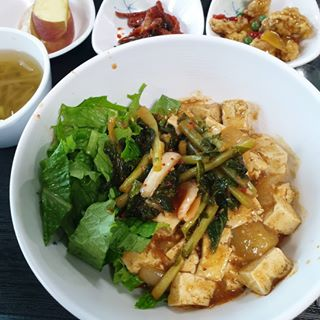

In [18]:
# shortcode 컬럼 데이터
import requests
# _id = "B60N6ADls-6"
_id = df.shortcode[0]
url = f'https://www.instagram.com/p/{_id}/media'
Picture_request = requests.get(url)

from IPython.display import Image
if Picture_request.status_code == 200:
    with open("lime.jpg", 'wb') as f:
        f.write(Picture_request.content)
    data_img = Picture_request.content

Image(data=data_img) # Image(filename='image.jpg') 

## **03 edge_media_to_caption 의 HASH TAG 수집**
**[Image Download by requests](https://stackoverflow.com/questions/50948061/how-to-save-or-download-an-image-that-i-get-in-a-request-python)**

In [6]:
# Hash Tag
df.edge_media_to_caption[0]['edges'][0]['node']['text']#.split('#')

'#월요일 #점심 #구내식당 #된장열무비빔밥'

## **04 'User Id'**  to  **'User Name'**
**[Image Download by requests](https://stackoverflow.com/questions/50948061/how-to-save-or-download-an-image-that-i-get-in-a-request-python)**

In [7]:
header = {'User-Agent':"Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0"}
user_id = '6025763784'
url = f"https://i.instagram.com/api/v1/users/{user_id}/info/"
url

'https://i.instagram.com/api/v1/users/6025763784/info/'

In [8]:
requests.get(url, headers=header).text

'{"message": "useragent mismatch", "status": "fail"}'

In [9]:
df.loc[0]

comments_disabled                                                      False
__typename                                                        GraphImage
id                                                       2215372823789522357
edge_media_to_caption      {'edges': [{'node': {'text': '#월요일 #점심 #구내식당 #...
shortcode                                                        B6-ldh_B021
edge_media_to_comment                                           {'count': 0}
taken_at_timestamp                                                1578313042
dimensions                                   {'height': 1080, 'width': 1080}
display_url                https://scontent-gmp1-1.cdninstagram.com/v/t51...
edge_liked_by                                                   {'count': 3}
edge_media_preview_like                                         {'count': 3}
owner                                                   {'id': '1729999149'}
thumbnail_src              https://scontent-gmp1-1.cdninstagram.com/v/t51...

In [10]:
set(df.accessibility_caption )

{'Image may contain: dessert, drink and food',
 'Image may contain: food',
 'Image may contain: food and indoor',
 'Image may contain: indoor',
 'Image may contain: one or more people',
 'Image may contain: people sitting, table, food and indoor',
 nan}

<br/>

# **3 수집결과 마무리 함수로 적용**

## **1 위에서 전처리 내용을 함수로 적용**

In [14]:
import pandas as pd
df = pd.DataFrame(data)
df = df[df.is_video==False]
# print(df.head(1))
df.head(3)

,comments_disabled,__typename,id,edge_media_to_caption,shortcode,edge_media_to_comment,taken_at_timestamp,dimensions,display_url,edge_liked_by,edge_media_preview_like,owner,thumbnail_src,thumbnail_resources,is_video,accessibility_caption,video_view_count
0,False,GraphImage,2215372823789522357,{'edges': [{'node': {'text': '#월요일 #점심 #구내식당 #...,B6-ldh_B021,{'count': 0},1578313042,"{'height': 1080, 'width': 1080}",https://scontent-gmp1-1.cdninstagram.com/v/t51...,{'count': 3},{'count': 3},{'id': '1729999149'},https://scontent-gmp1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-gmp1-1.cdninstagram...,False,Image may contain: food,NaN
1,False,GraphSidecar,2215371089362825399,{'edges': [{'node': {'text': '.\n아이들과 자주 가는 도서...,B6-lESrJDC3,{'count': 0},1578312835,"{'height': 1080, 'width': 1080}",https://scontent-gmp1-1.cdninstagram.com/v/t51...,{'count': 1},{'count': 1},{'id': '1786524157'},https://scontent-gmp1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-gmp1-1.cdninstagram...,False,Image may contain: one or more people,NaN
2,False,GraphSidecar,2215364035381511097,{'edges': [{'node': {'text': '#한화푸디스트 #한화코스콤점 ...,B6-jdpJF0O5,{'count': 0},1578311994,"{'height': 774, 'width': 1080}",https://scontent-gmp1-1.cdninstagram.com/v/t51...,{'count': 0},{'count': 0},{'id': '26320520115'},https://scontent-gmp1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-gmp1-1.cdninstagram...,False,Image may contain: food,NaN


In [15]:
df.columns

Index(['comments_disabled', '__typename', 'id', 'edge_media_to_caption',
       'shortcode', 'edge_media_to_comment', 'taken_at_timestamp',
       'dimensions', 'display_url', 'edge_liked_by', 'edge_media_preview_like',
       'owner', 'thumbnail_src', 'thumbnail_resources', 'is_video',
       'accessibility_caption', 'video_view_count'],
      dtype='object')

In [17]:
set(df.accessibility_caption)

{'Image may contain: dessert, drink and food',
 'Image may contain: food',
 'Image may contain: food and indoor',
 'Image may contain: indoor',
 'Image may contain: one or more people',
 'Image may contain: people sitting, table, food and indoor'}

In [12]:
df = df.loc[:,['taken_at_timestamp','owner','edge_media_to_caption',
       'edge_liked_by','edge_media_preview_like','thumbnail_src']] #,'accessibility_caption']]
# Hash Tag
# df.edge_media_to_caption[0]['edges'][0]['node']['text']#.split('#')
df.edge_media_to_caption = list(map(
    lambda x:x['edges'][0]['node']['text'], df.edge_media_to_caption))

import datetime
# your_timestamp = 1577965148
# date_.strftime('%Y/%m/%d %H:%M:%S')
df.taken_at_timestamp = list(map(
    lambda x: datetime.datetime.fromtimestamp(x), df.taken_at_timestamp))                                 
df.edge_liked_by = list(map(lambda x: int(x['count']) , df.edge_liked_by))
df.owner = list(map(lambda x: str(x['id']), df.owner))

df.edge_media_preview_like = list(map(lambda x: int(x['count']) , df.edge_media_preview_like))
df.columns = ['timestamp', 'owner_id', 'hashtag', 'like', 'like_media', 'image_src']
df.head(3)

,timestamp,owner_id,hashtag,like,like_media,image_src
0,2020-01-06 21:17:22,1729999149,#월요일 #점심 #구내식당 #된장열무비빔밥,3,3,https://scontent-gmp1-1.cdninstagram.com/v/t51...
1,2020-01-06 21:13:55,1786524157,.\n아이들과 자주 가는 도서관!\n책만 빌려서 갔는데 이번 주말은 2층 열람실에서...,1,1,https://scontent-gmp1-1.cdninstagram.com/v/t51...
2,2020-01-06 20:59:54,26320520115,#한화푸디스트 #한화코스콤점 #푸디스트 #구내식당 A-#돈육두루치기 #온두부 B-#백짬뽕,0,0,https://scontent-gmp1-1.cdninstagram.com/v/t51...


In [13]:
df.image_src[0]

'https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/81548680_2479344425646626_6807616884589903896_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=102&_nc_ohc=IGiX-S9Fsr0AX9PAMeU&oh=99652cd7fb702f34d31013dc89293281&oe=5EA0FF00'

In [15]:
df.image_src[0]

'https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c135.0.810.810a/s640x640/82274999_466995814210551_1972245816389972429_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=103&_nc_ohc=ZDxlWmO42V4AX8Yl_dR&oh=1aca9d4375e09d5445e506d2d4f22507&oe=5EAD09EA'

In [16]:
df.shape

(72, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 6 columns):
timestamp     72 non-null datetime64[ns]
owner_id      72 non-null object
hashtag       72 non-null object
like          72 non-null int64
like_media    72 non-null int64
image_src     72 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 6.4+ KB


In [20]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>timestamp</th>\n      <th>owner_id</th>\n      <th>hashtag</th>\n      <th>like</th>\n      <th>like_media</th>\n      <th>image_src</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2020-01-06 11:42:33</td>\n      <td>5615822791</td>\n      <td>0106(월)\\n묵은지와 닭의 환상궁합&gt;_&lt;\\n묵은지닭볶음탕입니다~~\\n맛있게드세요!</td>\n      <td>4</td>\n      <td>4</td>\n      <td>https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c135.0.810.810a/s640x640/82274999_466995814210551_1972245816389972429_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&amp;_nc_cat=103&amp;_nc_ohc=ZDxlWmO42V4AX8Yl_dR&amp;oh=1aca9d4375e09d5445e506d2d4f22507&amp;oe=5EAD09EA</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-01-06 11:38:34</td>\n      <td>8924846629</td>\n      <td>2020년 1월 6일 #행복한한식뷔페 #월요일점심메뉴 #닭갈비 #동그랑땡 #카레👍👍👍\\n.\\n.\\n#행복한한식뷔페에서 #맛있는 #점심 식사 하세요😄\\n.\\n.\\n#행복